In [21]:
import ROOT
import datetime
import os
import sys
import numpy as np
from IPython.display import Image as Plot
def destruct(object_):
    if issubclass(type(object_), ROOT.TObject):
        object_.IsA().Destructor(object_)

#Good res
g_xres = 1000
g_yres = 500
        
sys.path.insert(0, os.environ.get('PROJDIR_RATEANA'))
fermilabOffset = -6*60*60
ROOT.gStyle.SetTimeOffset(fermilabOffset);
ROOT.gStyle.SetPalette(ROOT.kRainBow);
ROOT.gStyle.SetOptStat(0)
outDir = 'Plots/'
extension = '.png'

startTime = ROOT.TDatime(2016,1,1,0,0,0).Convert()
endTime = ROOT.TDatime(2016,6,1,0,0,0).Convert()
stepSize = 24*60*60
nSteps = (endTime - startTime)/stepSize

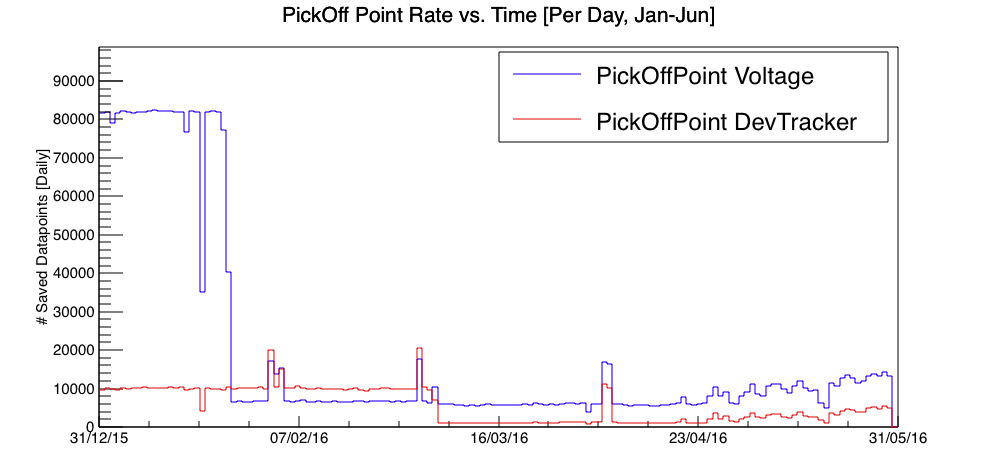

In [23]:
dataDir1 = 'Data/uB_TPCDrift_HV01_keithleyPickOff_getVoltage_160101_160601_86400s.dat'
dataDir2 = 'Data/uB_TPCDrift_HV01_keithleyPickOff_voltDiff5s60s_160101_160601_86400s.dat'
data1 = np.genfromtxt(dataDir1,delimiter=" ",names=True,dtype=None)
data2 = np.genfromtxt(dataDir2,delimiter=" ",names=True,dtype=None)

plotName = 'hPickOff'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
h1 = ROOT.TH1D("h1","PickOff Point Rate vs. Time [Per Day, Jan-Jun];;# Saved Datapoints [Daily]",nSteps,startTime,endTime)
h2 = ROOT.TH1D("h2","PickOff Point DeviationTracker Rate vs. Time [Per Day, Jan-Jun];;# Saved Datapoints [Daily]",nSteps,startTime,endTime)
h1.GetXaxis().SetTimeDisplay(1)
h1.GetXaxis().SetNdivisions(timeDivisions,0)
h1.GetYaxis().SetRangeUser(0,max(data['Rate']*1.2))
h1.GetYaxis().CenterTitle()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)

for i in range(len(data)):
    h1.SetBinContent(h1.FindBin(data1['Timestamp'][i]),data1['Rate'][i])
    h2.SetBinContent(h1.FindBin(data2['Timestamp'][i]),data2['Rate'][i])

    
h1.Draw("")
h2.Draw("SAME")

leg = ROOT.TLegend(0.5,0.7,0.89,0.89)
leg.AddEntry(h1,"PickOffPoint Voltage","l")
leg.AddEntry(h2,"PickOffPoint DevTracker","l")
leg.Draw()

c1.SaveAs(outDir+plotName+extension)
destruct(c1)
destruct(h1)
destruct(h2)
Plot(outDir+plotName+extension)